In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
file_path = "C:/Users/ktayl128/Desktop/Online Retail.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.dropna(inplace = True)
df.drop(columns = ["CustomerID", "InvoiceNo"], inplace = True)
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [5]:
df_rdy = pd.get_dummies(df, columns = ["Description"], drop_first = True)
df_rdy.drop(columns = ["StockCode"], inplace = True)
df_rdy.reset_index(drop = True)
df_rdy

,Quantity,InvoiceDate,UnitPrice,Country,Description_ 50'S CHRISTMAS GIFT BAG LARGE,Description_ DOLLY GIRL BEAKER,Description_ I LOVE LONDON MINI BACKPACK,Description_ I LOVE LONDON MINI RUCKSACK,Description_ NINE DRAWER OFFICE TIDY,Description_ OVAL WALL MIRROR DIAMANTE,...,Description_ZINC STAR T-LIGHT HOLDER,Description_ZINC SWEETHEART SOAP DISH,Description_ZINC SWEETHEART WIRE LETTER RACK,Description_ZINC T-LIGHT HOLDER STAR LARGE,Description_ZINC T-LIGHT HOLDER STARS LARGE,Description_ZINC T-LIGHT HOLDER STARS SMALL,Description_ZINC TOP 2 DOOR WOODEN SHELF,Description_ZINC WILLIE WINKIE CANDLE STICK,Description_ZINC WIRE KITCHEN ORGANISER,Description_ZINC WIRE SWEETHEART LETTER TRAY
0,6,2010-12-01 08:26:00,2.55,United Kingdom,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6,2010-12-01 08:26:00,3.39,United Kingdom,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,2010-12-01 08:26:00,2.75,United Kingdom,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6,2010-12-01 08:26:00,3.39,United Kingdom,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6,2010-12-01 08:26:00,3.39,United Kingdom,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541905,6,2011-12-09 12:50:00,2.10,France,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541906,4,2011-12-09 12:50:00,4.15,France,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541907,4,2011-12-09 12:50:00,4.15,France,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


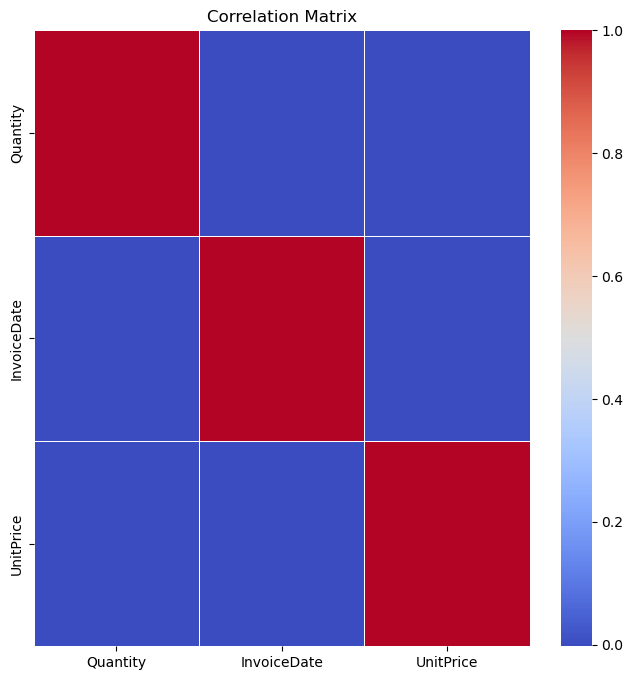

In [6]:
df_num = df_rdy.iloc[:, :3]
df_rdy_corr = df_num.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(df_rdy_corr, annot = False, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X = df_rdy.drop(columns=["Country"])
y = df_rdy["Country"]
x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 5)
x_train_classification = x_train_classification.select_dtypes(include=[np.number]).copy()
x_test_classification = x_test_classification.select_dtypes(include=[np.number]).copy()
x_train_classification.fillna(0, inplace=True)
x_test_classification.fillna(0, inplace=True)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=30)
dt_model.fit(x_train_classification, y_train_classification)
dt_preds = dt_model.predict(x_test_classification)
print(classification_report(y_test_classification, dt_preds))

C:\Users\ktayl128\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ktayl128\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

           Australia       0.24      0.04      0.07       255
             Austria       0.00      0.00      0.00        68
             Bahrain       0.00      0.00      0.00         3
             Belgium       0.70      0.04      0.08       399
              Brazil       0.00      0.00      0.00         5
              Canada       0.00      0.00      0.00        22
     Channel Islands       0.33      0.01      0.01       151
              Cyprus       0.33      0.01      0.02       109
      Czech Republic       0.00      0.00      0.00         3
             Denmark       0.00      0.00      0.00        82
                EIRE       0.29      0.01      0.02      1502
  European Community       0.00      0.00      0.00        14
             Finland       0.30      0.04      0.07       146
              France       0.28      0.01      0.02      1730
             Germany       0.50      0.04      0.07      1854
       

C:\Users\ktayl128\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
'''
x_df_num = df[["Quantity", "Country"]]
x_df_num = pd.get_dummies(df[["Quantity", "Country"]], drop_first=True)
x_const = sm.add_constant(x_df_num)
lin_reg_model = sm.OLS(df["UnitPrice"], x_const).fit()
print(lin_reg_model.summary())
'''
import pandas as pd
import statsmodels.api as sm

df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors='coerce')
df["Quantity"] = pd.to_numeric(df["Quantity"], errors='coerce')
df["UnitPrice"].fillna(0, inplace=True)
df["Quantity"].fillna(0, inplace=True)
df["Country_encoded"] = df.groupby("Country")["UnitPrice"].transform("mean")
x_df_num = df[["Quantity", "Country_encoded"]]
x_const = sm.add_constant(x_df_num)
y = df["UnitPrice"]
try:
    lin_reg_model = sm.OLS(y, x_const).fit()
    print(lin_reg_model.summary())
except ValueError as e:
    print("Error:", e)
    print("Check if 'x_const' and 'y' are fully numeric and aligned.")

C:\Users\ktayl128\AppData\Local\Temp\2\ipykernel_20236\292738333.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["UnitPrice"].fillna(0, inplace=True)
C:\Users\ktayl128\AppData\Local\Temp\2\ipykernel_20236\292738333.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     282.9
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.65e-123
Time:                        04:04:24   Log-Likelihood:            -2.3014e+06
No. Observations:              406829   AIC:                         4.603e+06
Df Residuals:                  406826   BIC:                         4.603e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0042      0.182     

In [10]:
import pandas as pd
file_path = r'C:\Users\ktayl128\Desktop\Online Retail.xlsx'
data = pd.read_excel(file_path)
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


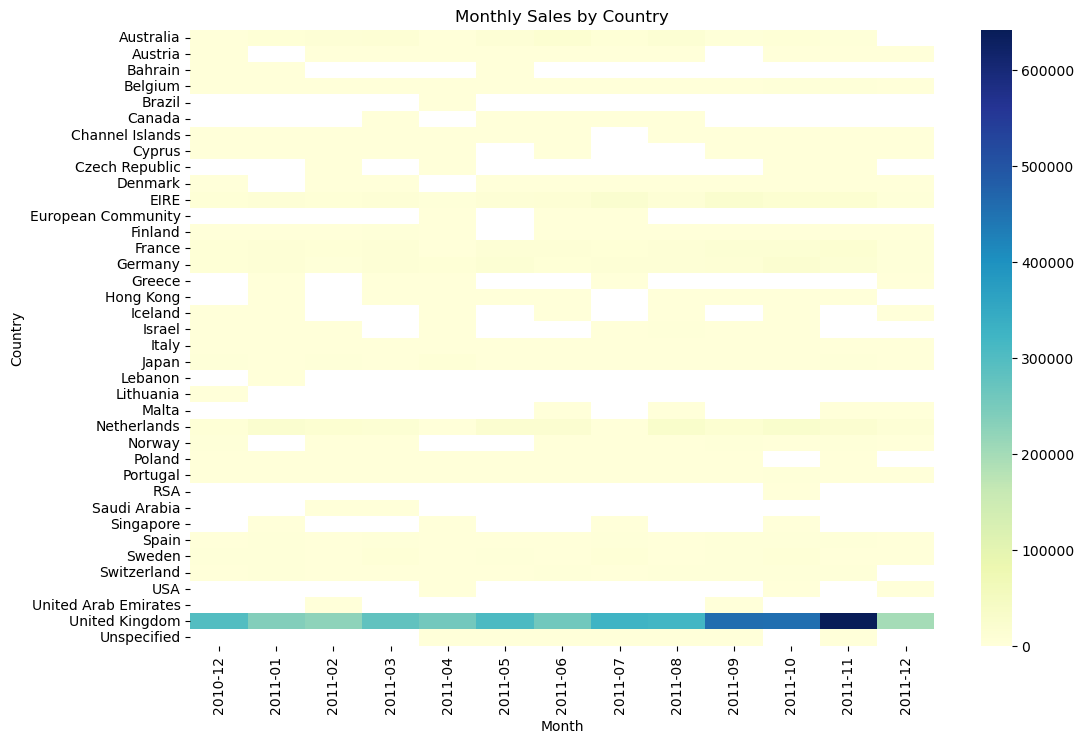

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby(['Country', 'Month'])['Quantity'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales, cmap='YlGnBu')
plt.title("Monthly Sales by Country")
plt.show()

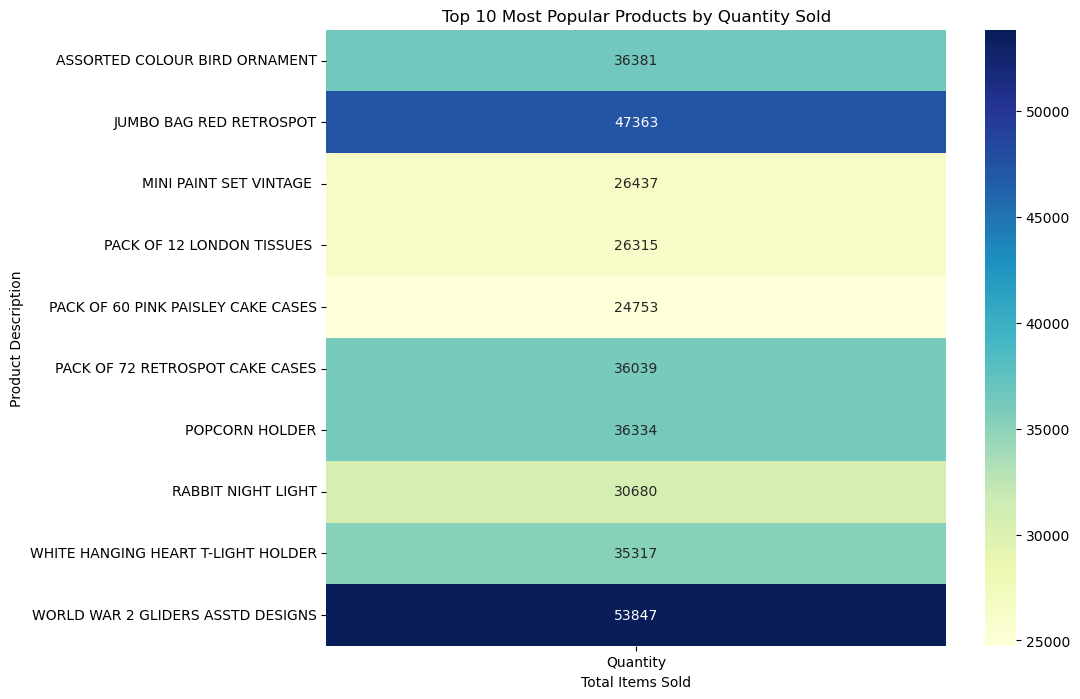

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

popular_products = data.groupby('Description').agg({'Quantity': 'sum'}).reset_index()

popular_products = popular_products.sort_values('Quantity', ascending=False).head(10)  

popular_products_pivot = popular_products.pivot_table(
    values='Quantity',
    index='Description',
    aggfunc='sum'
)

plt.figure(figsize=(10, 8))
sns.heatmap(popular_products_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.xlabel('Total Items Sold')
plt.ylabel('Product Description')
plt.show()